### EMNIST classification using Convoluted Neural Network

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Data Analysis and Loading

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


data_dir = '/Users/pulasthyareddy/Downloads/datasets/cnn_dataset/'


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load data
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Dataset info
print(f"Total images: {len(dataset)}")
print(f"Categories: {len(dataset.classes)}")
print(f"Sample shape: {dataset[0][0].shape}")


Total images: 100800
Categories: 36
Sample shape: torch.Size([1, 28, 28])


In [ ]:
#Counts in each class (2800)
from collections import Counter
class_counts = Counter(dataset.targets)
labels= dataset.classes
counts={labels[i]:class_counts[i] for i in range(len(labels))}
print(counts)

{'0': 2800, '1': 2800, '2': 2800, '3': 2800, '4': 2800, '5': 2800, '6': 2800, '7': 2800, '8': 2800, '9': 2800, 'A': 2800, 'B': 2800, 'C': 2800, 'D': 2800, 'E': 2800, 'F': 2800, 'G': 2800, 'H': 2800, 'I': 2800, 'J': 2800, 'K': 2800, 'L': 2800, 'M': 2800, 'N': 2800, 'O': 2800, 'P': 2800, 'Q': 2800, 'R': 2800, 'S': 2800, 'T': 2800, 'U': 2800, 'V': 2800, 'W': 2800, 'X': 2800, 'Y': 2800, 'Z': 2800}


### Data Visualisation

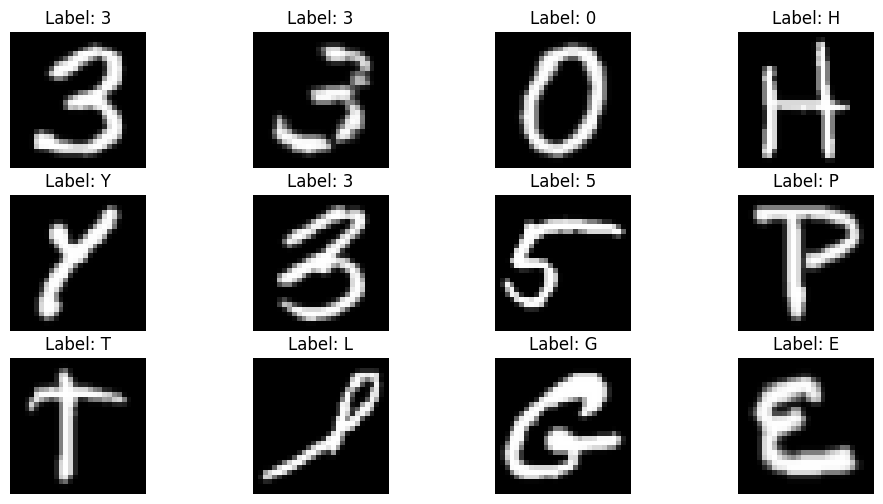

In [ ]:
def visualize_images(images, labels, class_names):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f'Label: {class_names[labels[i]]}')
        plt.axis('off')
    plt.show()

def display_samples(dataset, num_images=12):
    indices = torch.randperm(len(dataset))[:num_images]
    sample_images = [dataset[i][0] for i in indices]
    sample_labels = [dataset[i][1] for i in indices]
    class_names = dataset.classes
    visualize_images(sample_images, sample_labels, class_names)


display_samples(dataset)


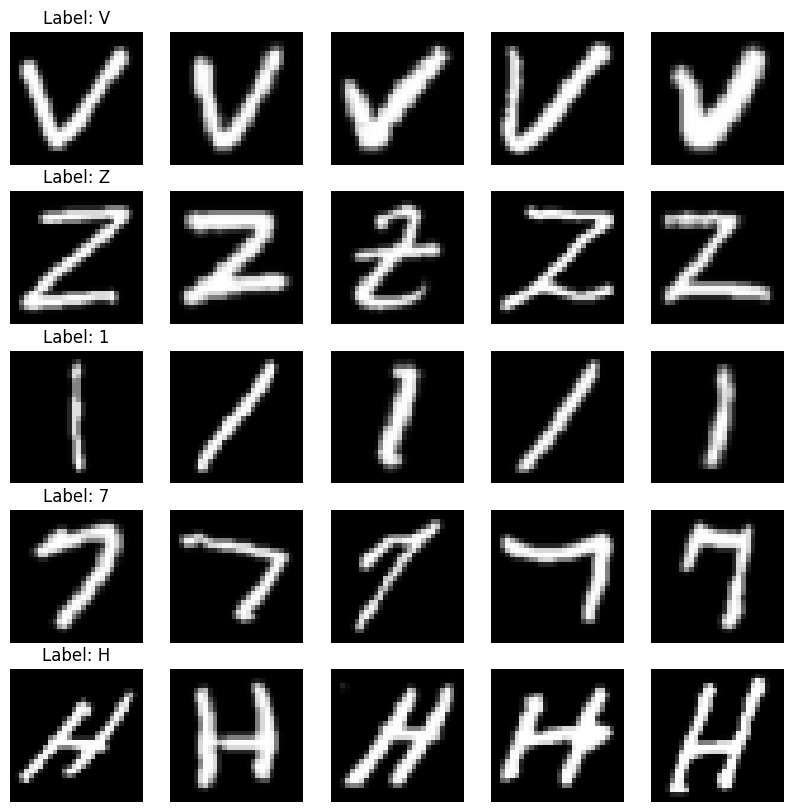

In [ ]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

#images per label
label_images = {}
num_labels = min(5, len(dataset.classes))
images_per_label = 5

# Collect images for each label
for images, labels in data_loader:
    label = labels.item()

    if label not in label_images:
        label_images[label] = []

    if len(label_images[label]) < images_per_label:
        label_images[label].append(images[0])

    if len(label_images) >= num_labels and all(len(imgs) >= images_per_label for imgs in label_images.values()):
        break

fig, axes = plt.subplots(num_labels, images_per_label, figsize=(10, 10))
axes = axes.flatten()

# Plotting images with labels
idx = 0
for label, imgs in label_images.items():
    for img in imgs:
        if idx < len(axes):
            axes[idx].imshow(img.permute(1, 2, 0).mean(dim=2), cmap='gray')
            axes[idx].axis('off')
            if idx % images_per_label == 0:
                axes[idx].set_title(f"Label: {dataset.classes[label]}")
            idx += 1

plt.show()


### Data Splitting and Loading

In [ ]:
#Data Splitting
test_size=int(0.2*len(dataset))
train_size=int(0.6*len(dataset))
val_size=int(0.2*len(dataset))

#train,val,test=random_split(dataset,[train_size,val_size,test_size])
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, validate_data = train_test_split(train_data, test_size=0.2, random_state=42)


In [ ]:
batch_size=128
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
val_loader=DataLoader(validate_data,batch_size=batch_size)
test_loader=DataLoader(test_data,batch_size=batch_size)

In [ ]:
#Distribution of labels and no.of images in each dataset split
def check_class_distribution(loader):
    c=0
    class_counts = {}
    for _, labels in loader:
        for label in labels:

            if label.item() in class_counts:
                class_counts[label.item()] += 1
            else:
                class_counts[label.item()] = 1
            #c+=1
    return class_counts

print("Training Class Distribution:", check_class_distribution(train_loader))
print("Validation Class Distribution:", check_class_distribution(val_loader))
print("Test Class Distribution:", check_class_distribution(test_loader))

Training Class Distribution: {14: 1765, 11: 1796, 22: 1798, 21: 1782, 16: 1774, 12: 1751, 17: 1806, 2: 1794, 8: 1787, 4: 1739, 23: 1763, 19: 1788, 10: 1783, 28: 1804, 27: 1819, 29: 1821, 20: 1797, 32: 1826, 5: 1798, 33: 1791, 6: 1813, 34: 1787, 18: 1783, 15: 1785, 7: 1790, 31: 1784, 35: 1821, 0: 1779, 9: 1831, 13: 1743, 24: 1782, 3: 1791, 1: 1821, 26: 1814, 30: 1852, 25: 1754}
Validation Class Distribution: {18: 444, 5: 454, 12: 480, 8: 470, 20: 452, 14: 431, 10: 459, 1: 449, 13: 446, 26: 432, 23: 462, 31: 443, 6: 439, 35: 443, 16: 453, 27: 430, 9: 429, 2: 432, 30: 430, 15: 438, 3: 454, 33: 452, 21: 466, 17: 449, 7: 423, 29: 464, 28: 441, 11: 432, 19: 425, 25: 486, 24: 448, 34: 459, 0: 453, 22: 450, 32: 445, 4: 465}
Test Class Distribution: {34: 554, 26: 554, 35: 536, 33: 557, 30: 518, 8: 543, 7: 587, 29: 515, 3: 555, 17: 545, 28: 555, 32: 529, 22: 552, 5: 548, 13: 611, 9: 540, 25: 560, 19: 587, 2: 574, 11: 572, 23: 575, 15: 577, 21: 552, 18: 573, 20: 551, 12: 569, 0: 568, 31: 573, 27:

In [ ]:
#Random batch from train loader
data_iter = iter(train_loader)
images, labels = next(data_iter)
print(images.shape, labels.shape)


torch.Size([128, 1, 28, 28]) torch.Size([128])


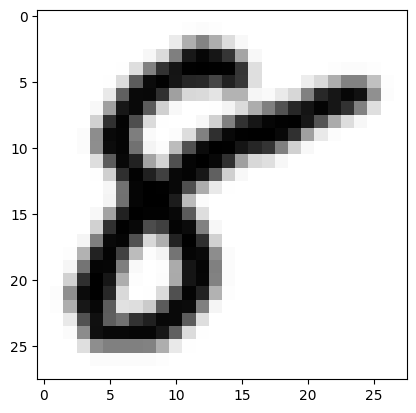

In [ ]:
#distribution of a single image
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

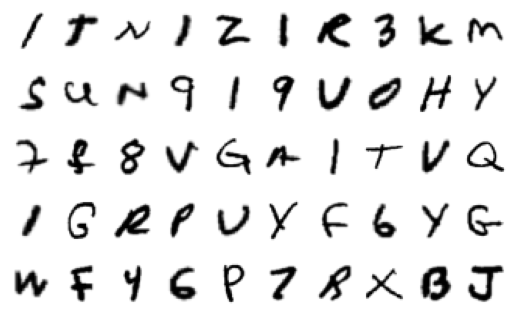

In [ ]:
#Collection of 50 sample images from train loader
figure = plt.figure()
num_of_images = 50
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
#Setting Device
import torch
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


### Defining CNN


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import torchinfo
import numpy as np
from sklearn.metrics import roc_curve,auc,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
#from itertools import cycle
import seaborn as sns

In [ ]:
#Defining CNN for classification
class CNN(nn.Module):
    def __init__(self, n_classes=36):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)


        self.dropout = nn.Dropout2d(0.2)
        self.fc1 = nn.Linear(256 * 1 * 1, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,n_classes)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = self.maxpool(F.gelu(self.conv1(x)))
        x = self.dropout(x)
        x = self.maxpool(F.tanh(self.conv2(x)))
        x = self.dropout(x)
        x = self.maxpool(F.gelu(self.conv3(x)))
        x = self.dropout(x)
        x = self.avgpool(F.tanh(self.conv4(x)))
        x = self.dropout(x)

        x = x.view(-1, 256 * 1 * 1)
        x = F.tanh(self.fc1(x))
        x = self.dropout(x)
        x = F.tanh(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

In [ ]:
print(device)

mps


In [ ]:
#Initialising model, loss function and optimiser
model = CNN(n_classes=36).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs=15
print(torchinfo.summary(model))


Layer (type:depth-idx)                   Param #
CNN                                      --
├─Conv2d: 1-1                            320
├─Conv2d: 1-2                            18,496
├─Conv2d: 1-3                            73,856
├─Conv2d: 1-4                            295,168
├─Dropout2d: 1-5                         --
├─Linear: 1-6                            65,792
├─Linear: 1-7                            32,896
├─Linear: 1-8                            4,644
├─MaxPool2d: 1-9                         --
├─AvgPool2d: 1-10                        --
Total params: 491,172
Trainable params: 491,172
Non-trainable params: 0


In [ ]:
#Training and validating and finding respective accuracies and losses for the given number of epochs
start_time = time.time()
loss_train=[]
acc_train=[]
loss_val=[]
acc_val=[]
best_val_accuracy = 0.0  # Track the best validation accuracy
best_model_weights = None
for epoch in range(epochs):
  running_loss=0
  model.train()
  total_batch_loss=0.0
  correct_predictions=0
  total_samples=0
  for images,labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    output = model(images)
    loss=loss_function(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    y_pred,y_pred_idx=torch.max(output,1)
    correct_predictions+=(y_pred_idx==labels).sum().item()
    total_samples+=labels.size(0)

  avg_train_loss=running_loss/len(train_loader)
  loss_train.append(avg_train_loss)

  #accuracy for the epoch
  accuracy=correct_predictions/total_samples
  acc_train.append(accuracy)

  model.eval()
  total_batch_loss_val=0.0
  correct_pred_val=0
  total_samples_val=0

  with torch.no_grad():
    for images_val,labels_val in val_loader:
      images_val,labels_val=images_val.to(device),labels_val.to(device)
      output_val=model(images_val)
      val_loss=loss_function(output_val,labels_val)
      total_batch_loss_val+=val_loss.item()
      _,label_idx=torch.max(output_val,1)
      correct_pred_val+=(label_idx==labels_val).sum().item()
      total_samples_val+=labels_val.size(0)

  avg_loss_val=total_batch_loss_val/len(val_loader)
  loss_val.append(avg_loss_val)

  accur_val=correct_pred_val/total_samples_val
  acc_val.append(accur_val)

  if accur_val>best_val_accuracy:
    best_val_accuracy=accur_val
    best_model_weights= model.state_dict()



  #print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(train_loader)))
  print(f"Epoch: {epoch} Train Loss: {avg_train_loss:.2f} Validation loss: {avg_loss_val:.2f} Training Acc: {accuracy:.2f} Validation Acc: {accur_val:.2f}")

train_time=(time.time()-start_time)/60
#print("Training Time:",time.time()-start_time)
print(f"Total training time:{train_time:.2f} seconds")
print(f"Best val accuracy: {best_val_accuracy:.2f}")

torch.save(best_model_weights, 'step1_model.pt')
org_time=train_time


Epoch: 0 Train Loss: 1.20 Validation loss: 0.43 Training Acc: 0.64 Validation Acc: 0.85
Epoch: 1 Train Loss: 0.45 Validation loss: 0.34 Training Acc: 0.84 Validation Acc: 0.88
Epoch: 2 Train Loss: 0.37 Validation loss: 0.29 Training Acc: 0.87 Validation Acc: 0.89
Epoch: 3 Train Loss: 0.34 Validation loss: 0.27 Training Acc: 0.88 Validation Acc: 0.90
Epoch: 4 Train Loss: 0.31 Validation loss: 0.26 Training Acc: 0.89 Validation Acc: 0.90
Epoch: 5 Train Loss: 0.29 Validation loss: 0.25 Training Acc: 0.89 Validation Acc: 0.90
Epoch: 6 Train Loss: 0.28 Validation loss: 0.26 Training Acc: 0.90 Validation Acc: 0.91
Epoch: 7 Train Loss: 0.27 Validation loss: 0.26 Training Acc: 0.90 Validation Acc: 0.91
Epoch: 8 Train Loss: 0.27 Validation loss: 0.25 Training Acc: 0.90 Validation Acc: 0.91
Epoch: 9 Train Loss: 0.26 Validation loss: 0.26 Training Acc: 0.90 Validation Acc: 0.90
Epoch: 10 Train Loss: 0.26 Validation loss: 0.24 Training Acc: 0.90 Validation Acc: 0.91
Epoch: 11 Train Loss: 0.25 Vali

##### Testing the model accuracy

In [ ]:
#loading model with best training weights
model.load_state_dict(torch.load('step1_model.pt'))
model.eval()

total_batch_loss_test=0
correct_pred_test=0
total_samples_test=0
loss_test=[]
accuracy_test=[]

classes=36
actuals=[]
pred=[]
prob=[]


with torch.no_grad():
    for test_images,test_labels in test_loader:
        img_test,label_test=test_images.to(device),test_labels.to(device)
        output_test=model(img_test)
        test_loss=loss_function(output_test,label_test)
        total_batch_loss_test+=test_loss.item()
        _,label_idx=torch.max(output_test,1)
        correct_pred_test+=(label_idx==label_test).sum().item()
        total_samples_test+=test_labels.size(0)

        actuals.extend(label_test.cpu().numpy())
        pred.extend(label_idx.cpu().numpy())
        prob.extend(output_test.cpu().numpy())

avg_loss_test=total_batch_loss_test/len(test_loader)
acc_test=correct_pred_test/total_samples_test

loss_test=[avg_loss_test for i in range(epochs)]
accuracy_test=[acc_test for i in range(epochs)]

org_acc=acc_test

#For ROC
actuals=np.array(actuals)
pred=np.array(pred)
prob=np.array(prob)
bins=label_binarize(actuals,classes=range(classes))

print(f"Test accuracy is : {acc_test:.2f}")



Test accuracy is : 0.91


In [ ]:
#Accuracy and other metrics
accuracy=accuracy_score(actuals,pred)
precision=precision_score(actuals,pred,average='macro')
recall=recall_score(actuals,pred,average='macro')
f1=f1_score(actuals,pred,average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1 score: {f1}')


Accuracy: 0.914781746031746
Precision: 0.9193466279530293
Recall: 0.9148080562117111
f1 score: 0.9137185096725341


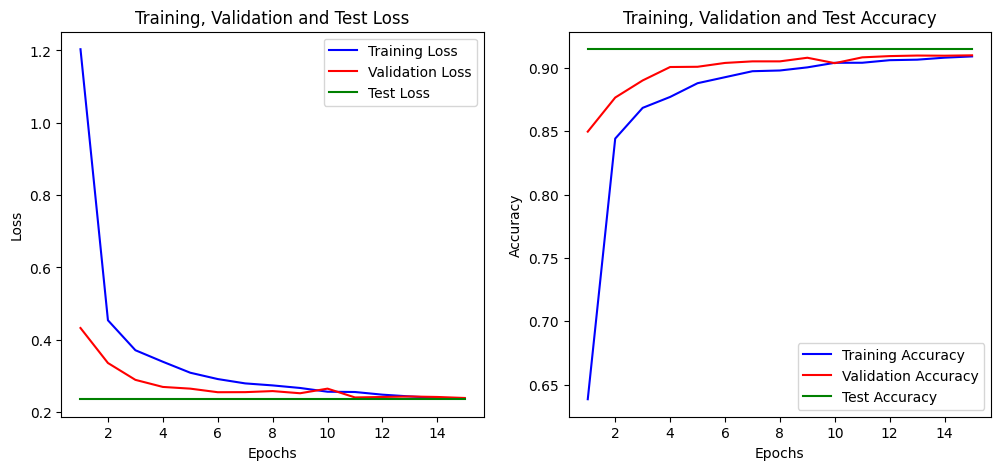

In [ ]:
#Training validation and test losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_train) + 1), loss_train, 'b', label='Training Loss')
plt.plot(range(1, len(loss_val) + 1), loss_val, 'r', label='Validation Loss')
plt.plot(range(1, len(loss_test) + 1),loss_test,color='green',label="Test Loss")
plt.title('Training, Validation and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(range(1, len(acc_train) + 1), acc_train, 'b', label='Training Accuracy')
plt.plot(range(1, len(acc_train) + 1), acc_val, 'r', label='Validation Accuracy')
plt.plot(range(1, len(accuracy_test) + 1),accuracy_test,color='green',label="Test Accuracy")
plt.title('Training, Validation and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

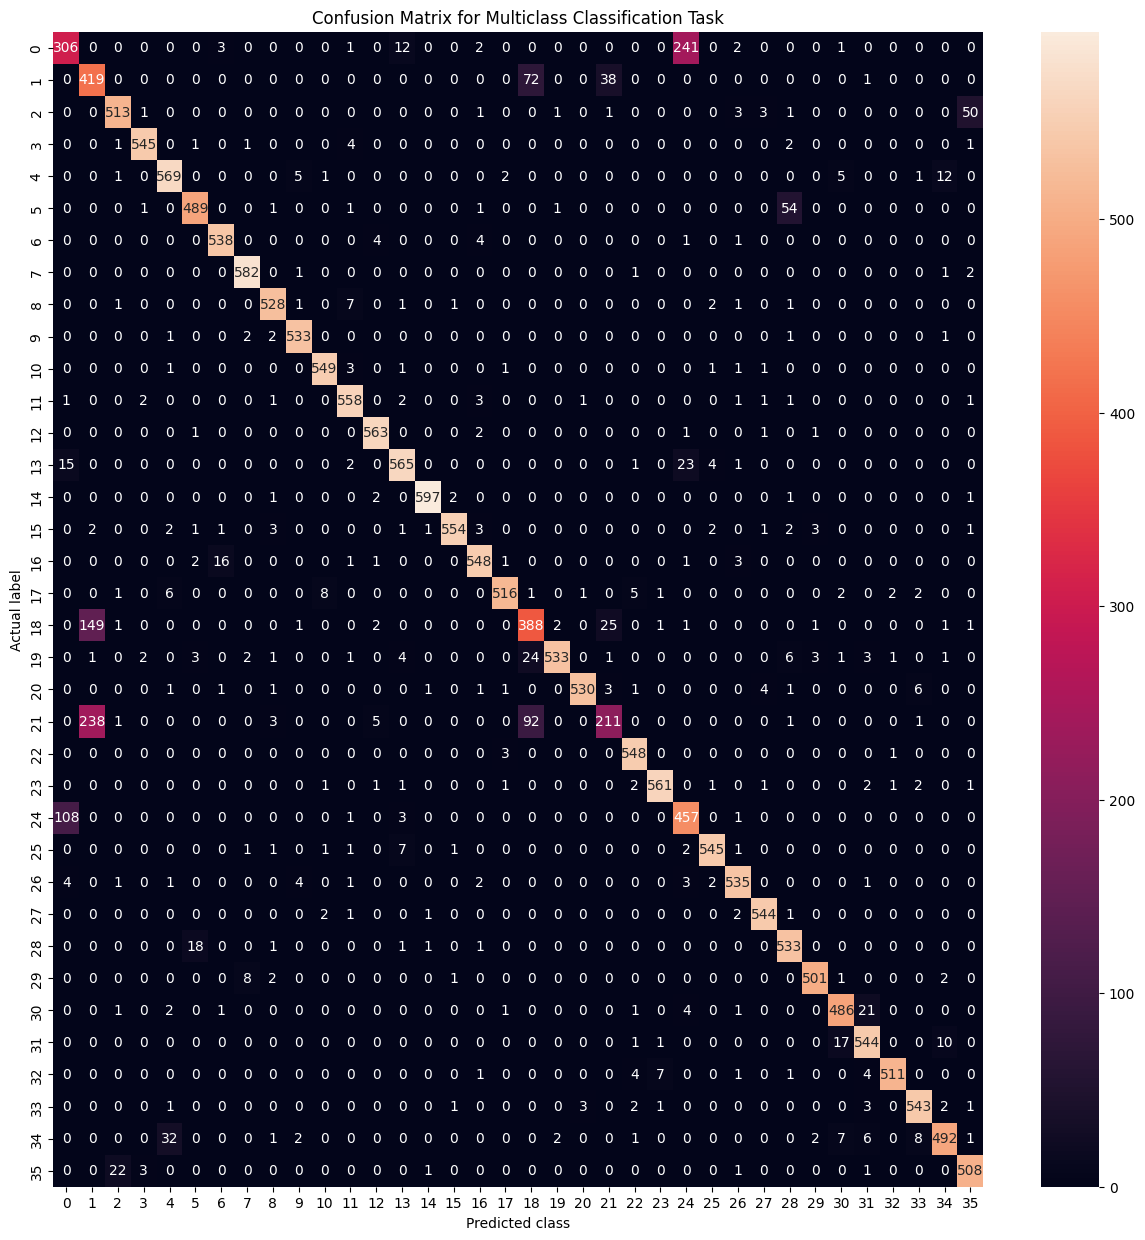

In [ ]:
#Confusion matrices
cm=confusion_matrix(actuals,pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt="d",xticklabels=range(classes),yticklabels=range(classes))
plt.xlabel("Predicted class")
plt.ylabel("Actual label")
plt.title("Confusion Matrix for Multiclass Classification Task")
plt.show()


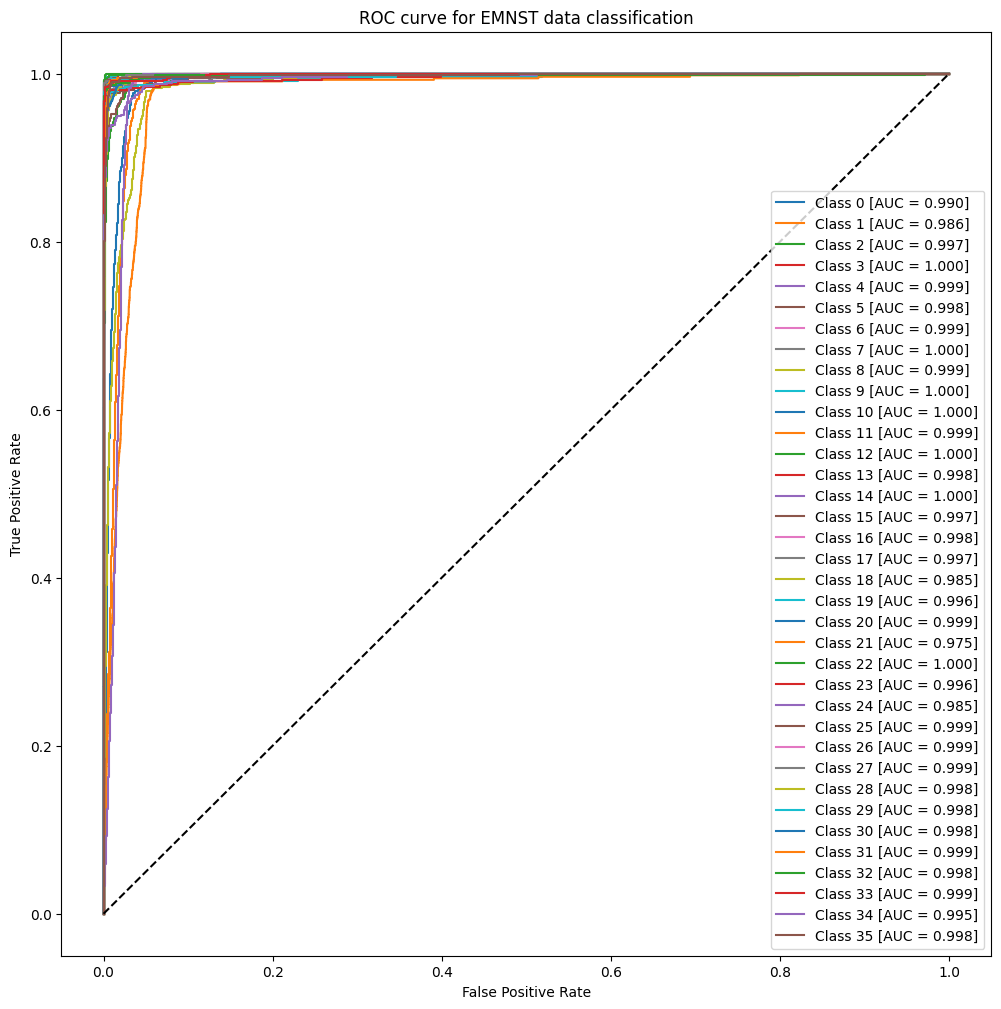

In [ ]:
#ROC curve
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(classes):
    fpr[i],tpr[i],_=roc_curve(bins[:,i],prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

plt.figure(figsize=(12,12))
for i in range(classes):
    plt.plot(fpr[i],tpr[i],label=f'Class {i} [AUC = {roc_auc[i]:.3f}]')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for EMNST data classification')
plt.legend(loc='lower right')
plt.show()


## Optimisations


### 1. Batch Normalisation

In [ ]:
# CNN model with Batch Normalization

class CNN(nn.Module):
    def __init__(self, n_classes=36):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.dropout = nn.Dropout2d(0.2)
        self.fc1 = nn.Linear(256 * 1 * 1, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,n_classes)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = self.maxpool(F.gelu(self.bn1(self.conv1(x))))
        x = self.dropout(x)
        x = self.maxpool(F.tanh(self.bn2(self.conv2(x))))
        x = self.dropout(x)
        x = self.maxpool(F.gelu(self.bn3(self.conv3(x))))
        x = self.dropout(x)
        x = self.avgpool(F.tanh(self.bn4(self.conv4(x))))
        x = self.dropout(x)

        x = x.view(-1, 256 * 1 * 1)
        x = F.tanh(self.fc1(x))
        x = self.dropout(x)
        x = F.tanh(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x


model = CNN(n_classes=36).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(torchinfo.summary(model))

start_time=time.time()
epochs = 15

best_val_accuracy = 0.0
best_model_weights = None
best_val_loss=float('inf')

#training and validation
start_time = time.time()
loss_train, acc_train, loss_val, acc_val = [], [], [], []

for epoch in range(epochs):
    running_loss = 0
    model.train()
    correct_predictions = 0
    total_samples = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, y_pred_idx = torch.max(output, 1)
        correct_predictions += (y_pred_idx == labels).sum().item()
        total_samples += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    loss_train.append(avg_train_loss)
    accuracy = correct_predictions / total_samples
    acc_train.append(accuracy)

    # Validation
    model.eval()
    total_batch_loss_val = 0.0
    correct_pred_val = 0
    total_samples_val = 0

    with torch.no_grad():
        for images_val, labels_val in val_loader:
            images_val, labels_val = images_val.to(device), labels_val.to(device)
            output_val = model(images_val)
            val_loss = loss_function(output_val, labels_val)
            total_batch_loss_val += val_loss.item()
            _, label_idx = torch.max(output_val, 1)
            correct_pred_val += (label_idx == labels_val).sum().item()
            total_samples_val += labels_val.size(0)

    avg_loss_val = total_batch_loss_val / len(val_loader)
    loss_val.append(avg_loss_val)
    accur_val = correct_pred_val / total_samples_val
    acc_val.append(accur_val)


    if accur_val > best_val_accuracy:
        best_val_accuracy = accur_val
        best_model_weights = model.state_dict()




    print(f"Epoch {epoch}")

    print(f"Train Loss: {avg_train_loss:.2f}, Validation Loss: {avg_loss_val:.2f}, Training Acc: {accuracy:.2f}, Validation Acc: {accur_val:.2f}")

train_time = (time.time() - start_time) / 60
print(f"Total training time: {train_time:.2f} minutes")
print(f"Best validation accuracy: {best_val_accuracy:.2f}")
opt_time=train_time
torch.save(best_model_weights, 'bn_model.pt')



# Load the best model weights

model.load_state_dict(torch.load('bn_model.pt'))
model.eval()

# Testing
total_batch_loss_test, correct_pred_test, total_samples_test = 0, 0, 0
actuals, pred, prob = [], [], []

with torch.no_grad():
    for test_images, test_labels in test_loader:
        img_test, label_test = test_images.to(device), test_labels.to(device)
        output_test = model(img_test)
        test_loss = loss_function(output_test, label_test)
        total_batch_loss_test += test_loss.item()
        _, label_idx = torch.max(output_test, 1)
        correct_pred_test += (label_idx == label_test).sum().item()
        total_samples_test += test_labels.size(0)

        actuals.extend(label_test.cpu().numpy())
        pred.extend(label_idx.cpu().numpy())
        prob.extend(output_test.cpu().numpy())

avg_loss_test = total_batch_loss_test / len(test_loader)
acc_test = correct_pred_test / total_samples_test
print(f"Test accuracy: {acc_test:.2f}")

loss_test = [avg_loss_test for i in range(epochs)]
accuracy_test = [acc_test for i in range(epochs)]

# For ROC
actuals = np.array(actuals)
pred = np.array(pred)
prob = np.array(prob)
bins = label_binarize(actuals, classes=range(36))
opt_acc=acc_test


Layer (type:depth-idx)                   Param #
CNN                                      --
├─Conv2d: 1-1                            320
├─BatchNorm2d: 1-2                       64
├─Conv2d: 1-3                            18,496
├─BatchNorm2d: 1-4                       128
├─Conv2d: 1-5                            73,856
├─BatchNorm2d: 1-6                       256
├─Conv2d: 1-7                            295,168
├─BatchNorm2d: 1-8                       512
├─Dropout2d: 1-9                         --
├─Linear: 1-10                           65,792
├─Linear: 1-11                           32,896
├─Linear: 1-12                           4,644
├─MaxPool2d: 1-13                        --
├─AvgPool2d: 1-14                        --
Total params: 492,132
Trainable params: 492,132
Non-trainable params: 0
Epoch 0
Train Loss: 1.00, Validation Loss: 0.39, Training Acc: 0.70, Validation Acc: 0.86
Epoch 1
Train Loss: 0.42, Validation Loss: 0.31, Training Acc: 0.85, Validation Acc: 0.89
Epoch 2
Tra

In [ ]:
#Accuracy and other metrics
print("Evaluation results after adding Batch Normalisation")
accuracy=accuracy_score(actuals,pred)
precision=precision_score(actuals,pred,average='macro')
recall=recall_score(actuals,pred,average='macro')
f1=f1_score(actuals,pred,average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1 score: {f1}')


Evaluation results after adding Batch Normalisation
Accuracy: 0.9101686507936508
Precision: 0.9168695063077672
Recall: 0.9101864018362372
f1 score: 0.9068367260161886


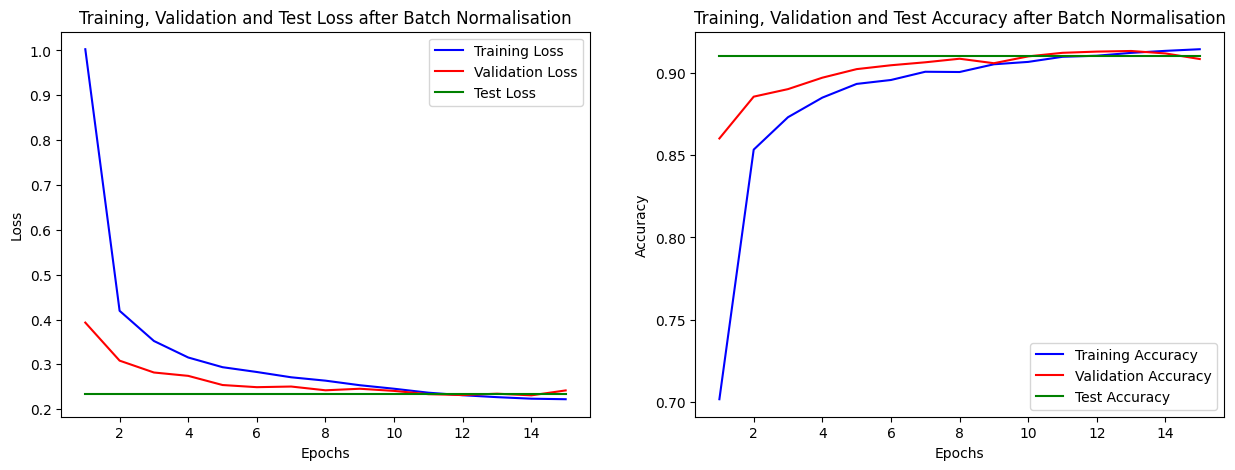

In [ ]:
#Training validation and test losses
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_train) + 1), loss_train, 'b', label='Training Loss')
plt.plot(range(1, len(loss_val) + 1), loss_val, 'r', label='Validation Loss')
plt.plot(range(1, len(loss_test) + 1),loss_test,color='green',label="Test Loss")
plt.title('Training, Validation and Test Loss after Batch Normalisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(range(1, len(acc_train) + 1), acc_train, 'b', label='Training Accuracy')
plt.plot(range(1, len(acc_train) + 1), acc_val, 'r', label='Validation Accuracy')
plt.plot(range(1, len(accuracy_test) + 1),accuracy_test,color='green',label="Test Accuracy")
plt.title('Training, Validation and Test Accuracy after Batch Normalisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

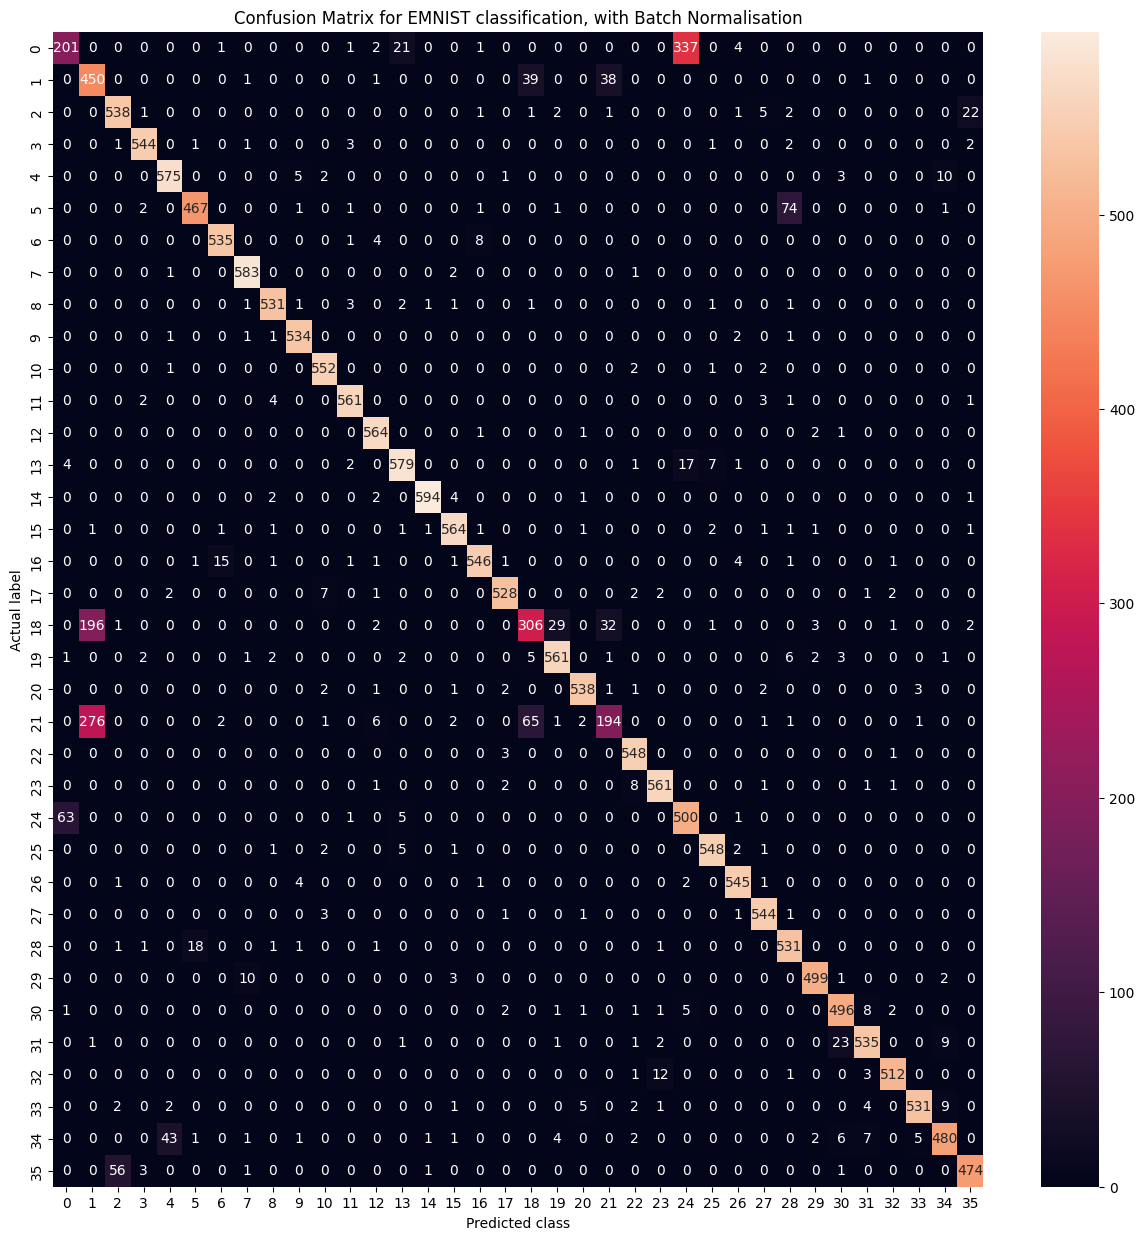

In [ ]:
#Confusion matrices
cm=confusion_matrix(actuals,pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt="d",xticklabels=range(classes),yticklabels=range(classes))
plt.xlabel("Predicted class")
plt.ylabel("Actual label")
plt.title("Confusion Matrix for EMNIST classification, with Batch Normalisation")
plt.show()


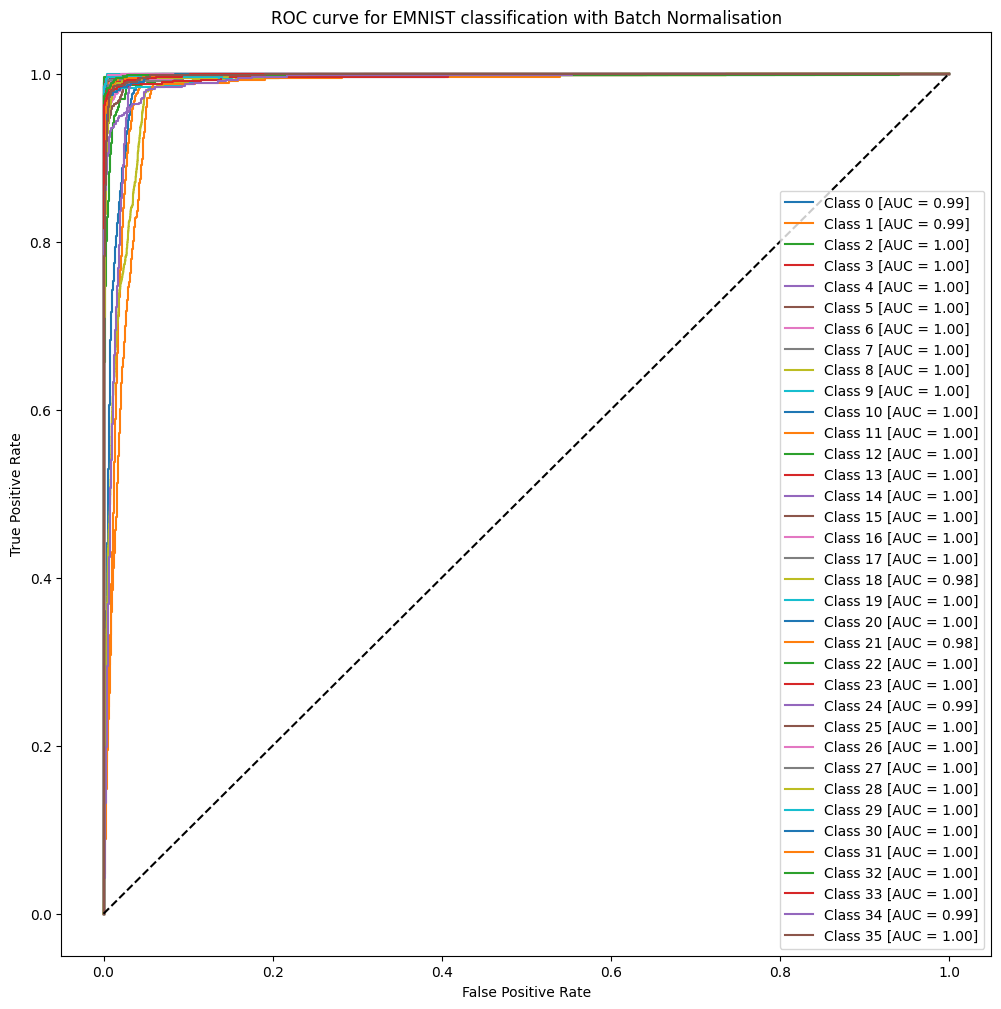

In [ ]:
#ROC curve
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(classes):
    fpr[i],tpr[i],_=roc_curve(bins[:,i],prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

plt.figure(figsize=(12,12))
for i in range(classes):
    plt.plot(fpr[i],tpr[i],label=f'Class {i} [AUC = {roc_auc[i]:.2f}]')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for EMNIST classification with Batch Normalisation')
plt.legend(loc='lower right')
plt.show()


### Learning Rate Scheduler

In [ ]:
# CNN model with Learning Rate Scheduler

class CNN(nn.Module):
    def __init__(self, n_classes=36):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)

        self.dropout = nn.Dropout2d(0.2)
        self.fc1 = nn.Linear(256 * 1 * 1, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,n_classes)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = self.maxpool(F.gelu(self.conv1(x)))
        x = self.dropout(x)
        x = self.maxpool(F.tanh(self.conv2(x)))
        x = self.dropout(x)
        x = self.maxpool(F.gelu(self.conv3(x)))
        x = self.dropout(x)
        x = self.avgpool(F.tanh(self.conv4(x)))
        x = self.dropout(x)

        x = x.view(-1, 256 * 1 * 1)
        x = F.tanh(self.fc1(x))
        x = self.dropout(x)
        x = F.tanh(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x


model = CNN(n_classes=36).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(torchinfo.summary(model))
#Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1)


start_time=time.time()
epochs = 15

best_val_accuracy = 0.0
best_model_weights = None
best_val_loss=float('inf')

start_time = time.time()
loss_train, acc_train, loss_val, acc_val = [], [], [], []

for epoch in range(epochs):
    running_loss = 0
    model.train()
    correct_predictions = 0
    total_samples = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, y_pred_idx = torch.max(output, 1)
        correct_predictions += (y_pred_idx == labels).sum().item()
        total_samples += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    loss_train.append(avg_train_loss)
    accuracy = correct_predictions / total_samples
    acc_train.append(accuracy)

    # Validation
    model.eval()
    total_batch_loss_val = 0.0
    correct_pred_val = 0
    total_samples_val = 0

    with torch.no_grad():
        for images_val, labels_val in val_loader:
            images_val, labels_val = images_val.to(device), labels_val.to(device)
            output_val = model(images_val)
            val_loss = loss_function(output_val, labels_val)
            total_batch_loss_val += val_loss.item()
            _, label_idx = torch.max(output_val, 1)
            correct_pred_val += (label_idx == labels_val).sum().item()
            total_samples_val += labels_val.size(0)

    avg_loss_val = total_batch_loss_val / len(val_loader)
    loss_val.append(avg_loss_val)
    accur_val = correct_pred_val / total_samples_val
    acc_val.append(accur_val)


    if accur_val > best_val_accuracy:
        best_val_accuracy = accur_val
        best_model_weights = model.state_dict()



    # Stepping up learning rate scheduler
    print(f"Epoch {epoch} , Learning Rate: {optimizer.param_groups[0]['lr']}")
    scheduler.step()

    print(f"Train Loss: {avg_train_loss:.2f}, Validation Loss: {avg_loss_val:.2f}, Training Acc: {accuracy:.2f}, Validation Acc: {accur_val:.2f}")

train_time = (time.time() - start_time) / 60
print(f"Total training time: {train_time:.2f} minutes")
print(f"Best validation accuracy: {best_val_accuracy:.2f}")
opt_time=train_time
torch.save(best_model_weights, 'lr_opt_model.pt')



# Load the best model weights
model.load_state_dict(torch.load('lr_opt_model.pt'))
model.eval()

# Testing
total_batch_loss_test, correct_pred_test, total_samples_test = 0, 0, 0
actuals, pred, prob = [], [], []

with torch.no_grad():
    for test_images, test_labels in test_loader:
        img_test, label_test = test_images.to(device), test_labels.to(device)
        output_test = model(img_test)
        test_loss = loss_function(output_test, label_test)
        total_batch_loss_test += test_loss.item()
        _, label_idx = torch.max(output_test, 1)
        correct_pred_test += (label_idx == label_test).sum().item()
        total_samples_test += test_labels.size(0)

        actuals.extend(label_test.cpu().numpy())
        pred.extend(label_idx.cpu().numpy())
        prob.extend(output_test.cpu().numpy())

avg_loss_test = total_batch_loss_test / len(test_loader)
acc_test = correct_pred_test / total_samples_test
print(f"Test accuracy: {acc_test:.2f}")

loss_test = [avg_loss_test for i in range(epochs)]
accuracy_test = [acc_test for i in range(epochs)]

# For ROC
actuals = np.array(actuals)
pred = np.array(pred)
prob = np.array(prob)
bins = label_binarize(actuals, classes=range(36))
opt_acc=acc_test


Layer (type:depth-idx)                   Param #
CNN                                      --
├─Conv2d: 1-1                            320
├─Conv2d: 1-2                            18,496
├─Conv2d: 1-3                            73,856
├─Conv2d: 1-4                            295,168
├─Dropout2d: 1-5                         --
├─Linear: 1-6                            65,792
├─Linear: 1-7                            32,896
├─Linear: 1-8                            4,644
├─MaxPool2d: 1-9                         --
├─AvgPool2d: 1-10                        --
Total params: 491,172
Trainable params: 491,172
Non-trainable params: 0
Epoch 0 , Learning Rate: 0.001
Train Loss: 1.21, Validation Loss: 0.42, Training Acc: 0.63, Validation Acc: 0.85
Epoch 1 , Learning Rate: 0.001
Train Loss: 0.45, Validation Loss: 0.31, Training Acc: 0.85, Validation Acc: 0.89
Epoch 2 , Learning Rate: 0.001
Train Loss: 0.37, Validation Loss: 0.29, Training Acc: 0.87, Validation Acc: 0.89
Epoch 3 , Learning Rate: 0.001


In [ ]:
#Accuracy and other metrics
print("Evaluation results after adding Learning Rate Scheduler")
accuracy=accuracy_score(actuals,pred)
precision=precision_score(actuals,pred,average='macro')
recall=recall_score(actuals,pred,average='macro')
f1=f1_score(actuals,pred,average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1 score: {f1}')


Evaluation results after adding Learning Rate Scheduler
Accuracy: 0.9205357142857142
Precision: 0.9241659468651121
Recall: 0.9206580544995321
f1 score: 0.9198714837818736


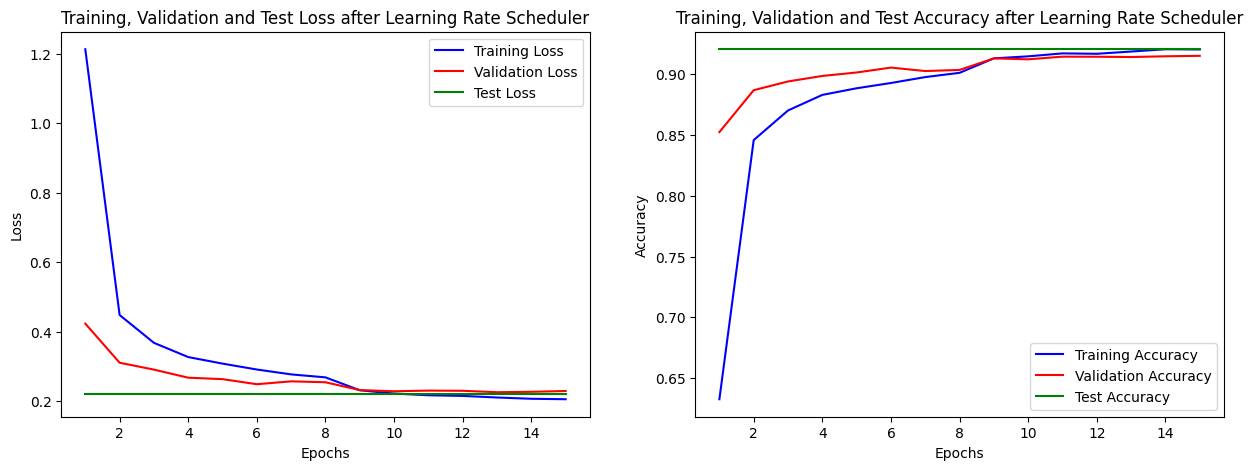

In [ ]:
#Training validation and test losses
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_train) + 1), loss_train, 'b', label='Training Loss')
plt.plot(range(1, len(loss_val) + 1), loss_val, 'r', label='Validation Loss')
plt.plot(range(1, len(loss_test) + 1),loss_test,color='green',label="Test Loss")
plt.title('Training, Validation and Test Loss after Learning Rate Scheduler')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(range(1, len(acc_train) + 1), acc_train, 'b', label='Training Accuracy')
plt.plot(range(1, len(acc_train) + 1), acc_val, 'r', label='Validation Accuracy')
plt.plot(range(1, len(accuracy_test) + 1),accuracy_test,color='green',label="Test Accuracy")
plt.title('Training, Validation and Test Accuracy after Learning Rate Scheduler')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

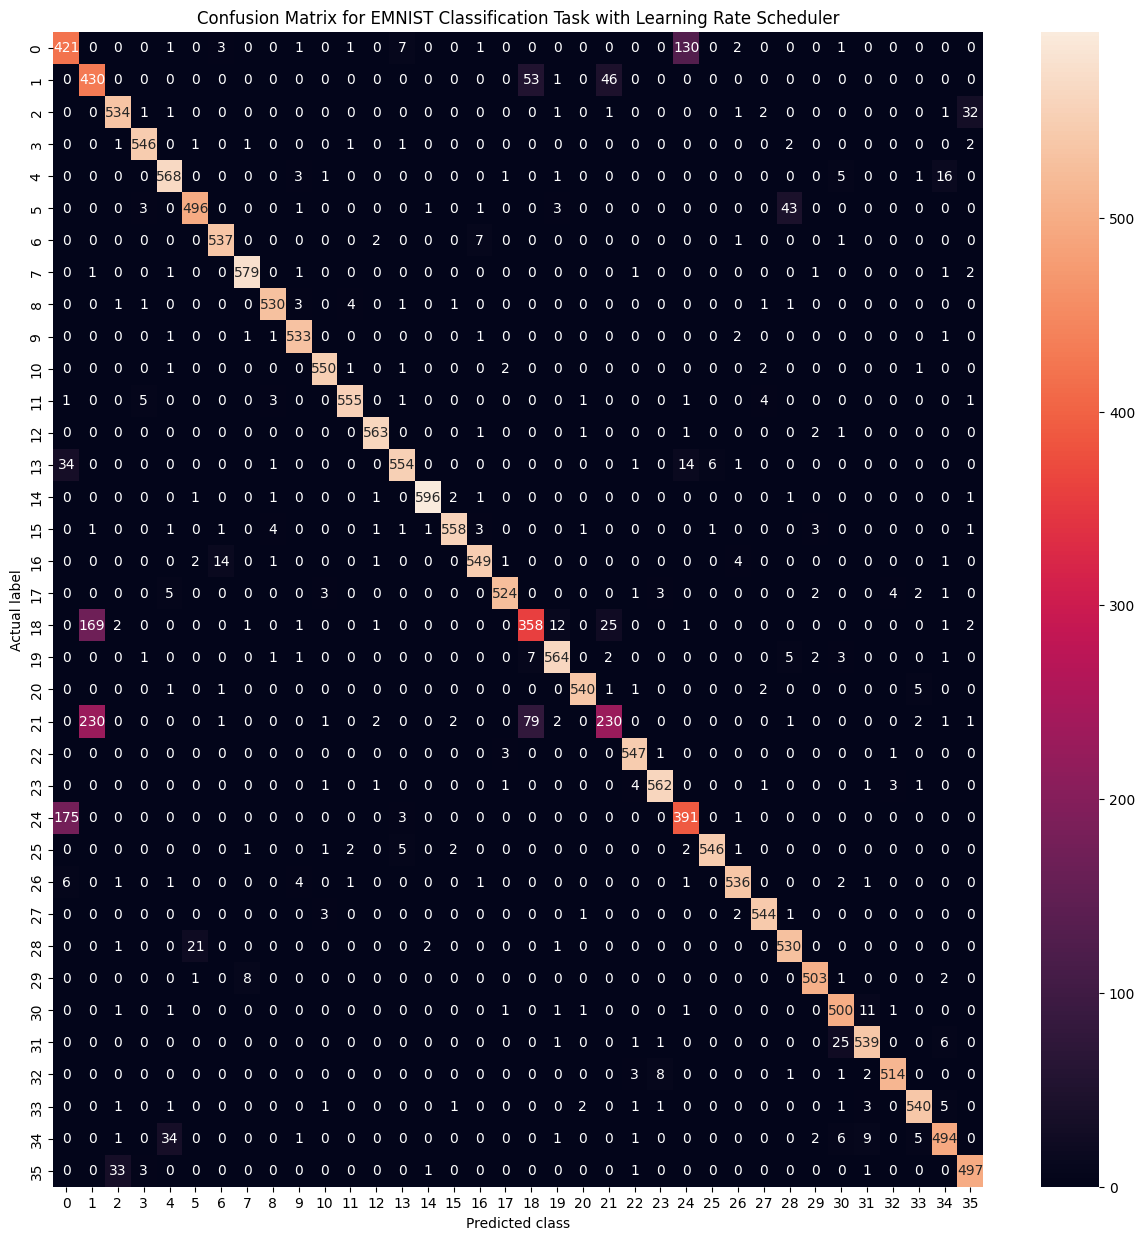

In [ ]:
#Confusion matrices
cm=confusion_matrix(actuals,pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt="d",xticklabels=range(classes),yticklabels=range(classes))
plt.xlabel("Predicted class")
plt.ylabel("Actual label")
plt.title("Confusion Matrix for EMNIST Classification Task with Learning Rate Scheduler")
plt.show()


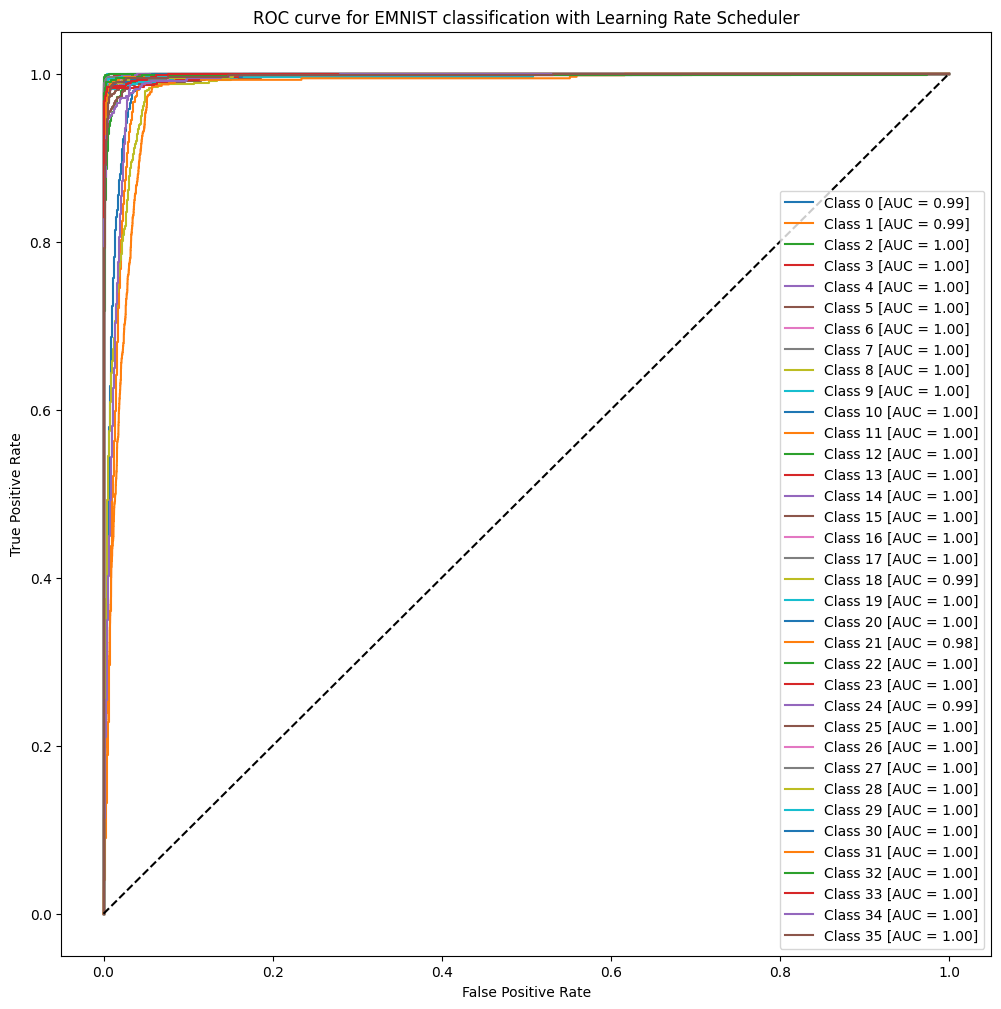

In [ ]:
#ROC curve
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(classes):
    fpr[i],tpr[i],_=roc_curve(bins[:,i],prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

plt.figure(figsize=(12,12))
for i in range(classes):
    plt.plot(fpr[i],tpr[i],label=f'Class {i} [AUC = {roc_auc[i]:.2f}]')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for EMNIST classification with Learning Rate Scheduler')
plt.legend(loc='lower right')
plt.show()


### 3. Early stopping

In [ ]:
# CNN model with Early Stopping

class CNN(nn.Module):
    def __init__(self, n_classes=36):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)

        self.dropout = nn.Dropout2d(0.2)
        self.fc1 = nn.Linear(256 * 1 * 1, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,n_classes)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = self.maxpool(F.gelu(self.conv1(x)))
        x = self.dropout(x)
        x = self.maxpool(F.tanh(self.conv2(x)))
        x = self.dropout(x)
        x = self.maxpool(F.gelu(self.conv3(x)))
        x = self.dropout(x)
        x = self.avgpool(F.tanh(self.conv4(x)))
        x = self.dropout(x)

        x = x.view(-1, 256 * 1 * 1)
        x = F.tanh(self.fc1(x))
        x = self.dropout(x)
        x = F.tanh(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x


model = CNN(n_classes=36).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(torchinfo.summary(model))

# Early stopping parameters
start_time=time.time()
epochs = 15
patience = 3
best_val_accuracy = 0.0
best_model_weights = None
best_val_loss=float('inf')
stop_counter=0

# Training loop with Early Stopping
start_time = time.time()
loss_train, acc_train, loss_val, acc_val = [], [], [], []

for epoch in range(epochs):
    running_loss = 0
    model.train()
    correct_predictions = 0
    total_samples = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, y_pred_idx = torch.max(output, 1)
        correct_predictions += (y_pred_idx == labels).sum().item()
        total_samples += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    loss_train.append(avg_train_loss)
    accuracy = correct_predictions / total_samples
    acc_train.append(accuracy)

    # Validation
    model.eval()
    total_batch_loss_val = 0.0
    correct_pred_val = 0
    total_samples_val = 0

    with torch.no_grad():
        for images_val, labels_val in val_loader:
            images_val, labels_val = images_val.to(device), labels_val.to(device)
            output_val = model(images_val)
            val_loss = loss_function(output_val, labels_val)
            total_batch_loss_val += val_loss.item()
            _, label_idx = torch.max(output_val, 1)
            correct_pred_val += (label_idx == labels_val).sum().item()
            total_samples_val += labels_val.size(0)

    avg_loss_val = total_batch_loss_val / len(val_loader)
    loss_val.append(avg_loss_val)
    accur_val = correct_pred_val / total_samples_val
    acc_val.append(accur_val)


    if accur_val > best_val_accuracy:
        best_val_accuracy = accur_val
        best_model_weights = model.state_dict()

    # Early Stopping check
    if round(avg_loss_val,2) < round(best_val_loss,2):
        best_val_loss = round(avg_loss_val,2)
        stop_counter=0
    else:
        stop_counter+=1
    if stop_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    #print(f'Best val loss:{best_val_loss}, avg loss val: {avg_loss_val}, stop counter: {stop_counter}')


    print(f"Epoch {epoch}")
    print(f"Train Loss: {avg_train_loss:.2f}, Validation Loss: {avg_loss_val:.2f}, Training Acc: {accuracy:.2f}, Validation Acc: {accur_val:.2f}")

train_time = (time.time() - start_time) / 60
print(f"Total training time: {train_time:.2f} minutes")
print(f"Best validation accuracy: {best_val_accuracy:.2f}")
opt_time=train_time
torch.save(best_model_weights, 'es_opt_model.pt')



# Load the best model weights
model.load_state_dict(torch.load('es_opt_model.pt'))
model.eval()

# Testing
total_batch_loss_test, correct_pred_test, total_samples_test = 0, 0, 0
actuals, pred, prob = [], [], []

with torch.no_grad():
    for test_images, test_labels in test_loader:
        img_test, label_test = test_images.to(device), test_labels.to(device)
        output_test = model(img_test)
        test_loss = loss_function(output_test, label_test)
        total_batch_loss_test += test_loss.item()
        _, label_idx = torch.max(output_test, 1)
        correct_pred_test += (label_idx == label_test).sum().item()
        total_samples_test += test_labels.size(0)

        actuals.extend(label_test.cpu().numpy())
        pred.extend(label_idx.cpu().numpy())
        prob.extend(output_test.cpu().numpy())

avg_loss_test = total_batch_loss_test / len(test_loader)
acc_test = correct_pred_test / total_samples_test
print(f"Test accuracy: {acc_test:.2f}")

loss_test = [avg_loss_test for i in range(epochs)]
accuracy_test = [acc_test for i in range(epochs)]

# For ROC
actuals = np.array(actuals)
pred = np.array(pred)
prob = np.array(prob)
bins = label_binarize(actuals, classes=range(36))
opt_acc=acc_test


Layer (type:depth-idx)                   Param #
CNN                                      --
├─Conv2d: 1-1                            320
├─Conv2d: 1-2                            18,496
├─Conv2d: 1-3                            73,856
├─Conv2d: 1-4                            295,168
├─Dropout2d: 1-5                         --
├─Linear: 1-6                            65,792
├─Linear: 1-7                            32,896
├─Linear: 1-8                            4,644
├─MaxPool2d: 1-9                         --
├─AvgPool2d: 1-10                        --
Total params: 491,172
Trainable params: 491,172
Non-trainable params: 0
Epoch 0
Train Loss: 1.16, Validation Loss: 0.44, Training Acc: 0.65, Validation Acc: 0.85
Epoch 1
Train Loss: 0.46, Validation Loss: 0.33, Training Acc: 0.84, Validation Acc: 0.88
Epoch 2
Train Loss: 0.37, Validation Loss: 0.29, Training Acc: 0.87, Validation Acc: 0.89
Epoch 3
Train Loss: 0.34, Validation Loss: 0.28, Training Acc: 0.88, Validation Acc: 0.90
Epoch 4
Tr

In [ ]:
#Accuracy and other metrics
print("Evaluation results after adding early stopping")
accuracy=accuracy_score(actuals,pred)
precision=precision_score(actuals,pred,average='macro')
recall=recall_score(actuals,pred,average='macro')
f1=f1_score(actuals,pred,average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1 score: {f1}')


Evaluation results after adding early stopping
Accuracy: 0.9116567460317461
Precision: 0.9213356081454805
Recall: 0.9117979218542671
f1 score: 0.909384998708084


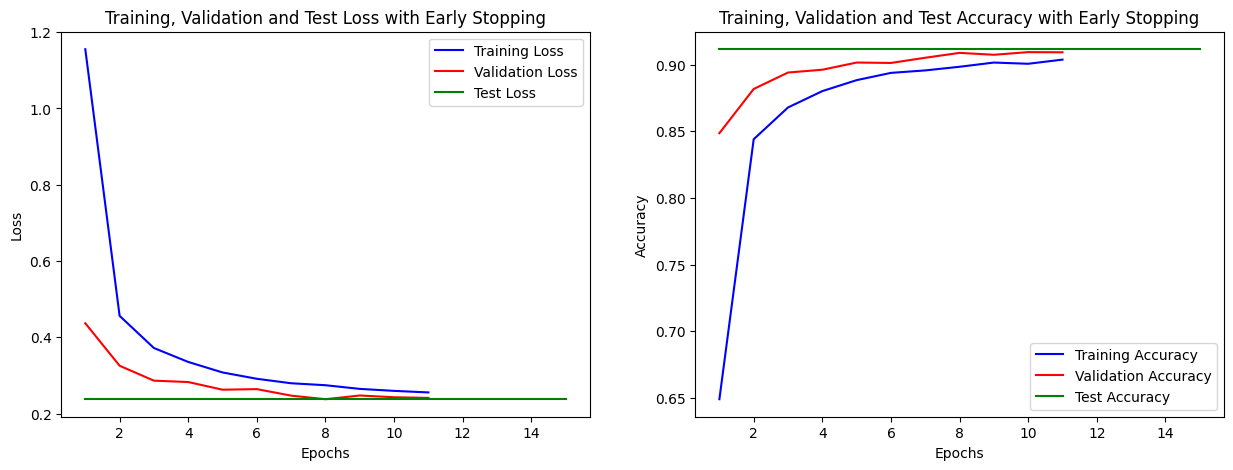

In [ ]:
#Training validation and test losses
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_train) + 1), loss_train, 'b', label='Training Loss')
plt.plot(range(1, len(loss_val) + 1), loss_val, 'r', label='Validation Loss')
plt.plot(range(1, len(loss_test) + 1),loss_test,color='green',label="Test Loss")
plt.title('Training, Validation and Test Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(range(1, len(acc_train) + 1), acc_train, 'b', label='Training Accuracy')
plt.plot(range(1, len(acc_train) + 1), acc_val, 'r', label='Validation Accuracy')
plt.plot(range(1, len(accuracy_test) + 1),accuracy_test,color='green',label="Test Accuracy")
plt.title('Training, Validation and Test Accuracy with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

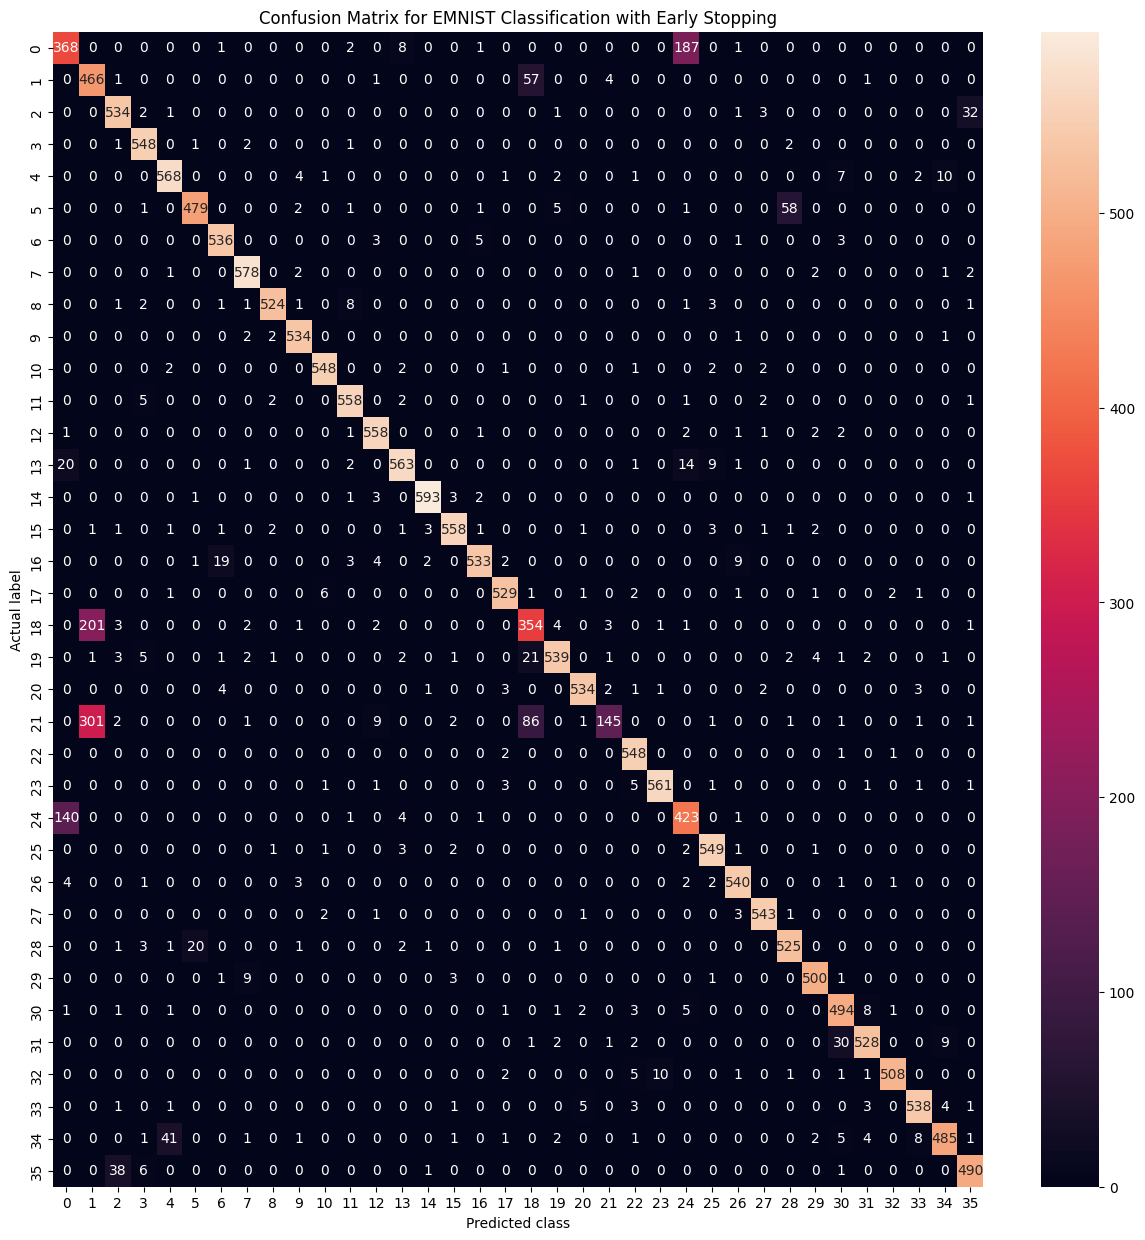

In [ ]:
#Confusion matrices
cm=confusion_matrix(actuals,pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt="d",xticklabels=range(classes),yticklabels=range(classes))
plt.xlabel("Predicted class")
plt.ylabel("Actual label")
plt.title("Confusion Matrix for EMNIST Classification with Early Stopping")
plt.show()


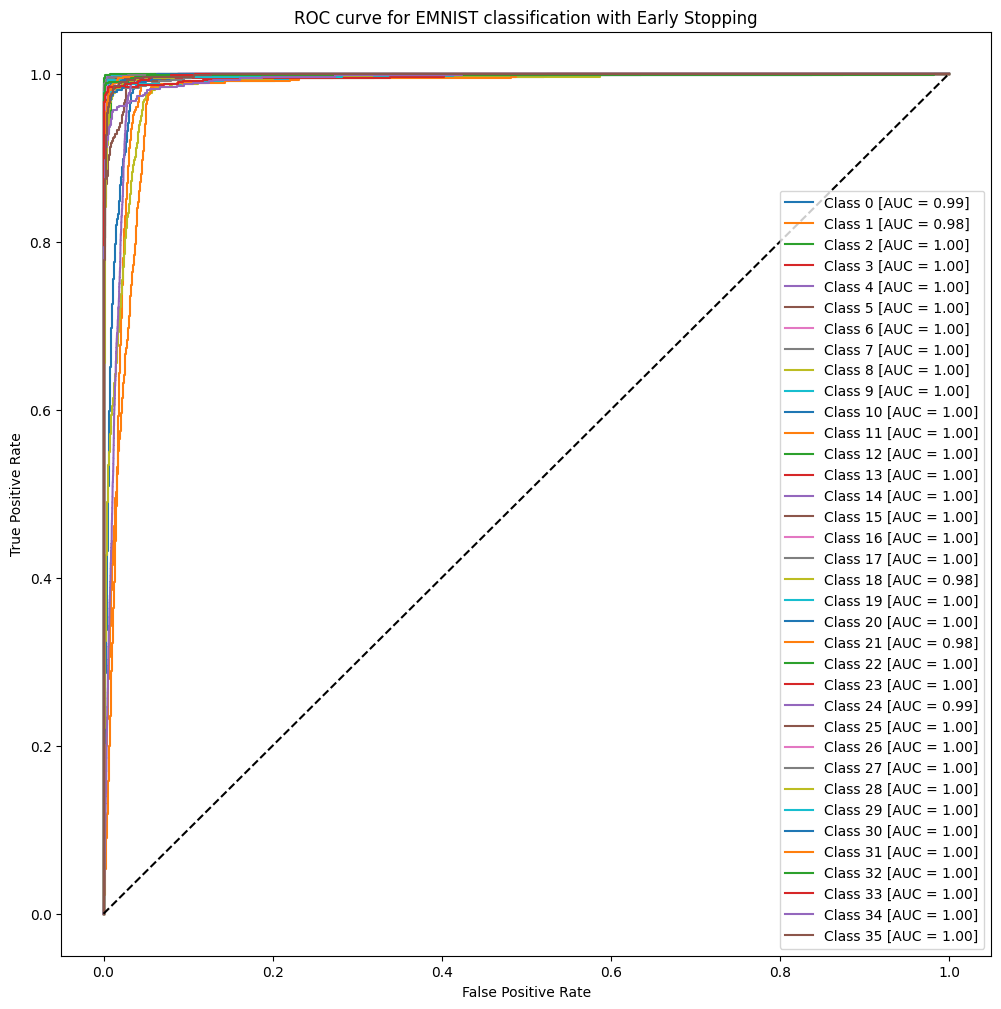

In [ ]:
#ROC curve
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(classes):
    fpr[i],tpr[i],_=roc_curve(bins[:,i],prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

plt.figure(figsize=(12,12))
for i in range(classes):
    plt.plot(fpr[i],tpr[i],label=f'Class {i} [AUC = {roc_auc[i]:.2f}]')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for EMNIST classification with Early Stopping')
plt.legend(loc='lower right')
plt.show()


- Of the optimisations: batch normalisation, learning rate scheduling, and early stopping, the model with Learning rate scheduler implemented achieves the highest - 92% accuracy